<a href="https://colab.research.google.com/github/Mahfila/MyDocking/blob/main/My_CDD_ML_Part_2_Acetylcholinesterase_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [3]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-04-21 13:20:51--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   290MB/s    in 0.3s    

2024-04-21 13:20:51 (290 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py

## **Load bioactivity data**

In [2]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv

--2024-04-21 13:16:19--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385924 (377K) [text/plain]
Saving to: ‘acetylcholinesterase_03_bioactivity_data_curated.csv’

acetylcholinesteras 100%[===================>] 376.88K  --.-KB/s    in 0.01s   

2024-04-21 13:16:19 (27.7 MB/s) - ‘acetylcholinesterase_03_bioactivity_data_curated.csv’ saved [385924/385924]



In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive


<Axes: xlabel='class'>

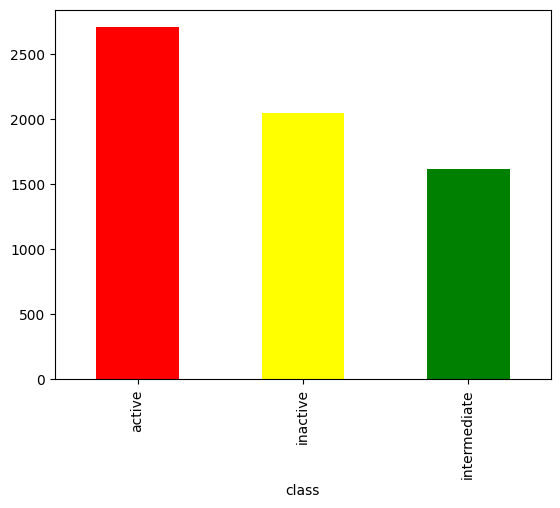

In [6]:
# @title Class Distribution

df['class'].value_counts().plot(kind='bar', color=['red', 'yellow', 'green'])

In [7]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [8]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [9]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.00,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.00,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.00,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
6364,CHEMBL2238282,160.00,active,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl
6365,CHEMBL4636881,7943.28,intermediate,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...
6366,CHEMBL4635134,100000.00,inactive,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O
6367,CHEMBL4639128,63095.73,inactive,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...


<Axes: ylabel='count'>

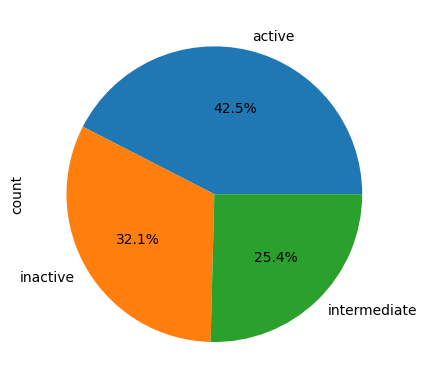

In [10]:
# @title Molecule Count by Class

df_clean_smiles['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [12]:
! pip install numpy

In [14]:
! pip install rdkit

     |████████████████████████████████| 29.5 MB 1.3 MB/s 


In [15]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [16]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [17]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.80320,0.0,6.0
1,376.913,4.55460,0.0,5.0
2,426.851,5.35740,0.0,5.0
3,404.845,4.70690,0.0,5.0
4,346.334,3.09530,0.0,6.0
...,...,...,...,...
6364,331.868,5.28790,0.0,3.0
6365,414.477,3.95740,3.0,4.0
6366,325.368,1.14840,2.0,4.0
6367,511.626,5.60034,1.0,8.0


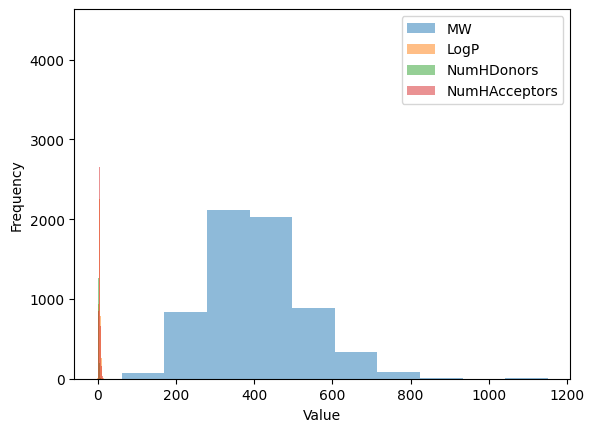

In [25]:
# @title Distribution of MW, LogP, NumHDonors, and NumHAcceptors

import matplotlib.pyplot as plt
plt.hist(df_lipinski['MW'], alpha=0.5, label='MW')
plt.hist(df_lipinski['LogP'], alpha=0.5, label='LogP')
plt.hist(df_lipinski['NumHDonors'], alpha=0.5, label='NumHDonors')
plt.hist(df_lipinski['NumHAcceptors'], alpha=0.5, label='NumHAcceptors')
plt.xlabel('Value')
plt.ylabel('Frequency')
_ = plt.legend()

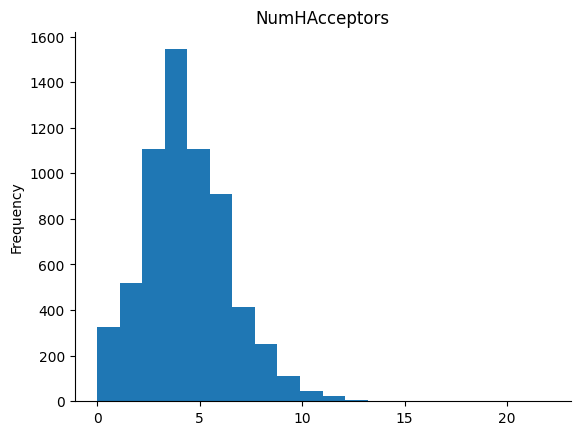

In [24]:
# @title NumHAcceptors

from matplotlib import pyplot as plt
df_lipinski['NumHAcceptors'].plot(kind='hist', bins=20, title='NumHAcceptors')
plt.gca().spines[['top', 'right',]].set_visible(False)

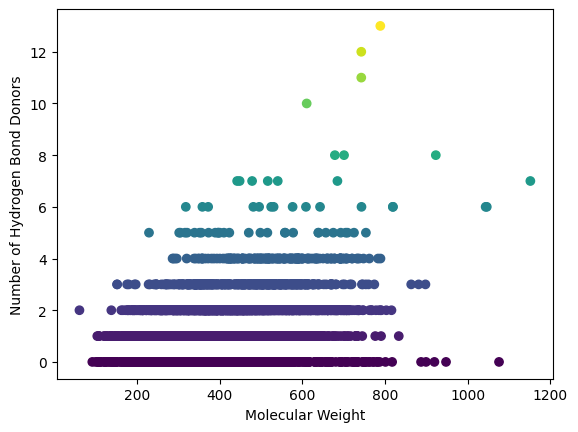

In [23]:
# @title Hydrogen Bond Donors vs Molecular Weight

import matplotlib.pyplot as plt
plt.scatter(df_lipinski['MW'], df_lipinski['NumHDonors'], c=df_lipinski['NumHDonors'])
plt.xlabel('Molecular Weight')
_ = plt.ylabel('Number of Hydrogen Bond Donors')

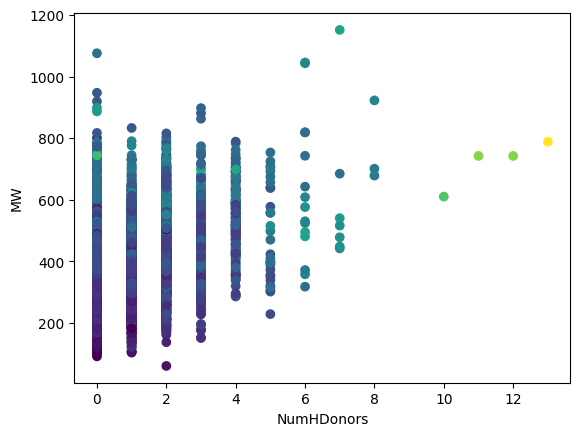

In [22]:
# @title NumHDonors vs MW, colored by NumHAcceptors

import matplotlib.pyplot as plt
plt.scatter(df_lipinski['NumHDonors'], df_lipinski['MW'], c=df_lipinski['NumHAcceptors'])
plt.xlabel('NumHDonors')
_ = plt.ylabel('MW')

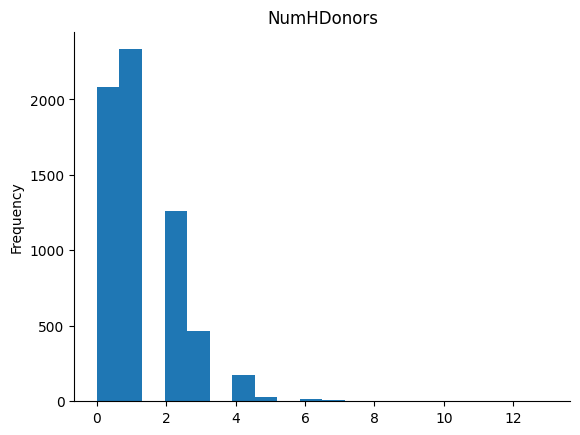

In [21]:
# @title NumHDonors

from matplotlib import pyplot as plt
df_lipinski['NumHDonors'].plot(kind='hist', bins=20, title='NumHDonors')
plt.gca().spines[['top', 'right',]].set_visible(False)

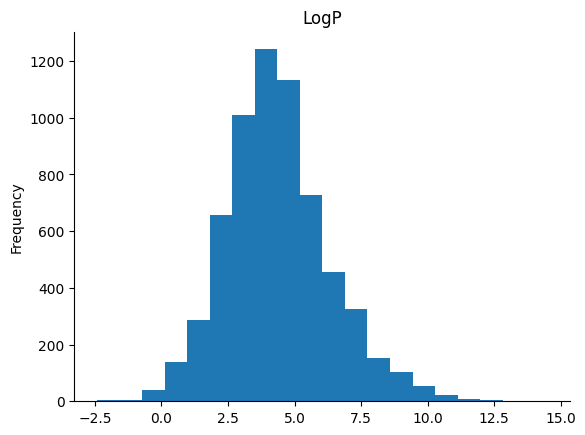

In [20]:
# @title LogP

from matplotlib import pyplot as plt
df_lipinski['LogP'].plot(kind='hist', bins=20, title='LogP')
plt.gca().spines[['top', 'right',]].set_visible(False)

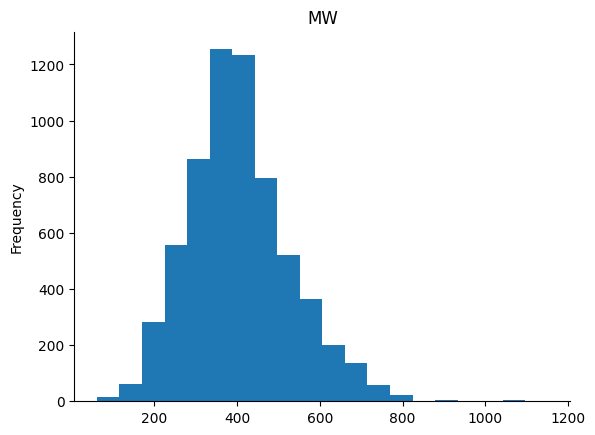

In [19]:
# @title MW

from matplotlib import pyplot as plt
df_lipinski['MW'].plot(kind='hist', bins=20, title='MW')
plt.gca().spines[['top', 'right',]].set_visible(False)

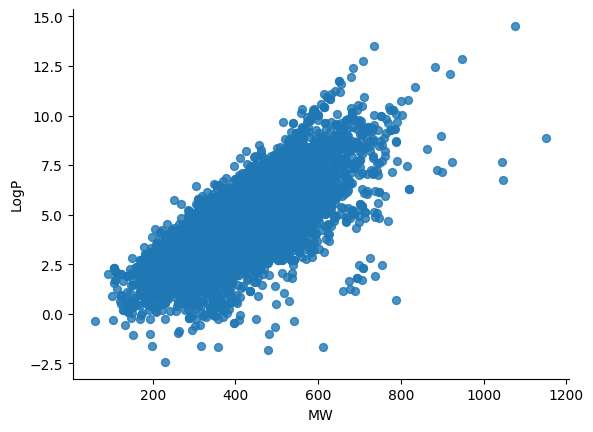

In [18]:
# @title MW vs LogP

from matplotlib import pyplot as plt
df_lipinski.plot(kind='scatter', x='MW', y='LogP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [26]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.80320,0.0,6.0
1,376.913,4.55460,0.0,5.0
2,426.851,5.35740,0.0,5.0
3,404.845,4.70690,0.0,5.0
4,346.334,3.09530,0.0,6.0
...,...,...,...,...
6364,331.868,5.28790,0.0,3.0
6365,414.477,3.95740,3.0,4.0
6366,325.368,1.14840,2.0,4.0
6367,511.626,5.60034,1.0,8.0


In [27]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive


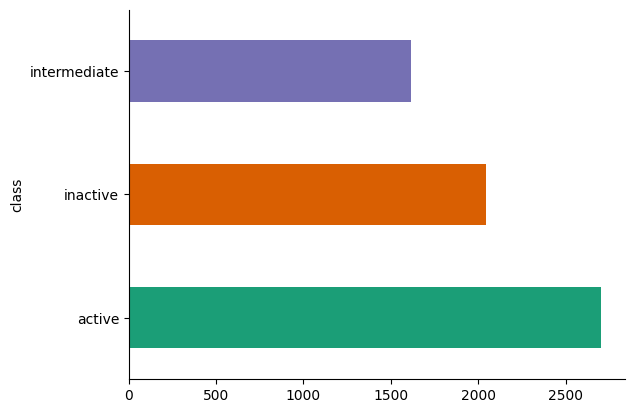

In [29]:
# @title class

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='molecule_chembl_id'>

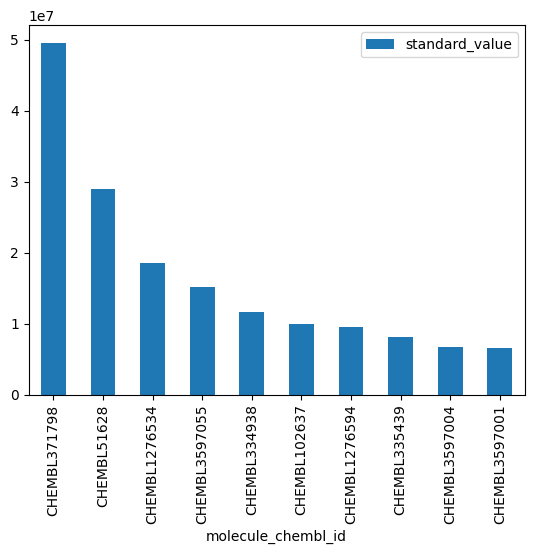

In [28]:
# @title Highest Standard Values

df.sort_values(by='standard_value', ascending=False).head(10).plot(kind='bar', x='molecule_chembl_id', y='standard_value')

Now, let's combine the 2 DataFrame

In [30]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [31]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.325,2.80320,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.913,4.55460,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.851,5.35740,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.845,4.70690,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.334,3.09530,0.0,6.0
...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active,331.868,5.28790,0.0,3.0
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate,414.477,3.95740,3.0,4.0
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive,325.368,1.14840,2.0,4.0
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive,511.626,5.60034,1.0,8.0


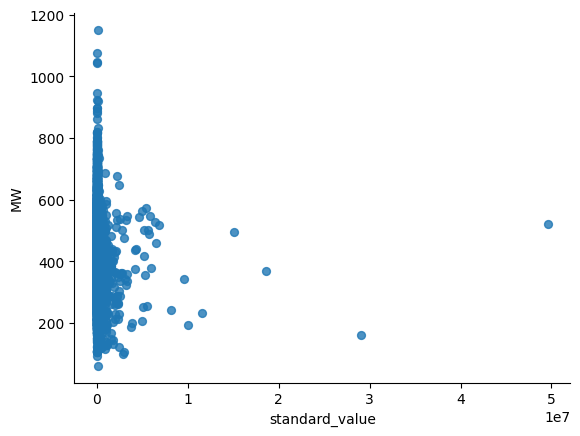

In [33]:
# @title standard_value vs MW

from matplotlib import pyplot as plt
df_combined.plot(kind='scatter', x='standard_value', y='MW', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

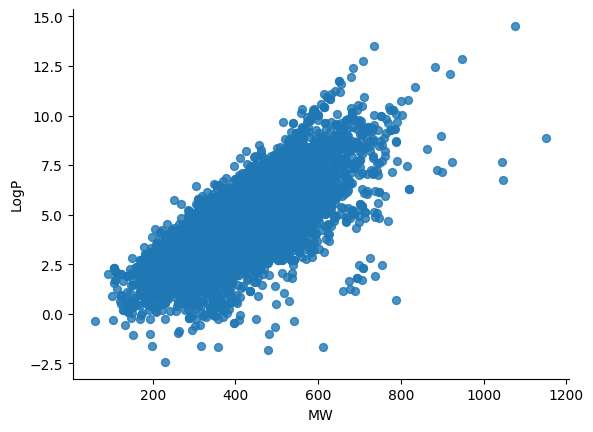

In [32]:
# @title MW vs LogP

from matplotlib import pyplot as plt
df_combined.plot(kind='scatter', x='MW', y='LogP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [34]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [35]:
df_combined.standard_value.describe()

count    6.369000e+03
mean     1.032539e+05
std      9.065149e+05
min      0.000000e+00
25%      1.445000e+02
50%      2.260000e+03
75%      1.580000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [36]:
-np.log10( (10**-9)* 100000000 )

1.0

In [37]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [38]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [42]:
import pandas as pd

In [43]:
def norm_value(input):
    # ...
    # Do something with input
    # ...
    x = input.drop('standard_value', axis=1)
    # ...
    return x

In [44]:
df_norm = norm_value(df_combined.copy())

In [45]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,750.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,100.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,50000.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,300.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,800.00
...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,active,331.868,5.28790,0.0,3.0,160.00
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,intermediate,414.477,3.95740,3.0,4.0,7943.28
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,100000.00
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,inactive,511.626,5.60034,1.0,8.0,63095.73


<Axes: xlabel='MW', ylabel='Count'>

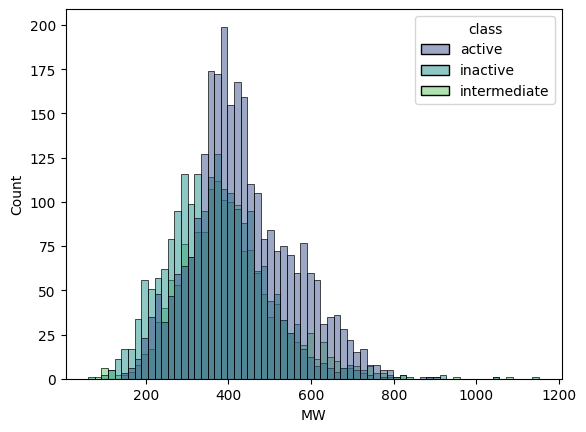

In [47]:
# @title MW distribution by class

sns.histplot(data=df_norm, x='MW', hue='class', palette='viridis')

array([<Axes: title={'center': 'NumHDonors'}, xlabel='class'>,
       <Axes: title={'center': 'NumHAcceptors'}, xlabel='class'>],
      dtype=object)

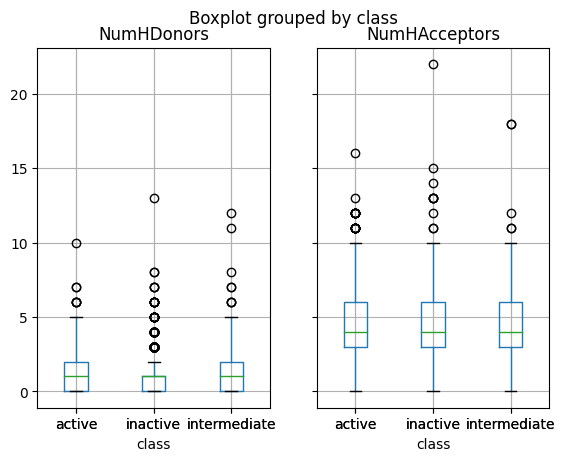

In [46]:
# @title H donors and acceptors by class

df_norm.boxplot(column=['NumHDonors', 'NumHAcceptors'], by='class')

In [41]:
!pip install pandas

In [48]:
df_norm.standard_value_norm.describe()

count    6.369000e+03
mean     1.032539e+05
std      9.065149e+05
min      0.000000e+00
25%      1.445000e+02
50%      2.260000e+03
75%      1.580000e+04
max      4.960000e+07
Name: standard_value_norm, dtype: float64

In [57]:
import numpy as np

def pIC50(input):
    pIC50 = []
    for molar in input['standard_value_norm']:
        if molar == 0:
            pIC50.append(np.nan)
        else:
            pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x


In [58]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,-2.875061
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,-2.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,-4.698970
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,-2.477121
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,-2.903090
...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,active,331.868,5.28790,0.0,3.0,-2.204120
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,intermediate,414.477,3.95740,3.0,4.0,-3.900000
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,-5.000000
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,inactive,511.626,5.60034,1.0,8.0,-4.800000


In [59]:
df_final = pIC50(df_norm)
print(df_final)

     molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL133897              CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1   
1          CHEMBL336398         O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1   
2          CHEMBL131588  CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1   
3          CHEMBL130628      O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F   
4          CHEMBL130478          CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C   
...                 ...                                                ...   
6364      CHEMBL2238282              O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl   
6365      CHEMBL4636881  CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...   
6366      CHEMBL4635134          CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O   
6367      CHEMBL4639128  COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...   
6368      CHEMBL5078078  CC(C)(O)c1ccc(N2Cc3c(ccnc3-c3ccc(F)cc3OCC(F)(F...   

             class       MW     LogP  NumHDonors  NumHAcceptors

In [61]:
df_final.pIC50.describe()

count    6368.000000
mean       -3.164365
std         1.559681
min        -7.695482
25%        -4.198993
50%        -3.355067
75%        -2.160993
max         5.301030
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [62]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [63]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,-2.875061
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,-2.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,-4.698970
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,-2.477121
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,-2.903090
...,...,...,...,...,...,...,...,...
6363,CHEMBL2238280,Cc1ccc(C(=O)/C=C/c2ccc(N3CCCCC3)cc2)s1,active,311.450,4.94292,0.0,3.0,-2.113943
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,active,331.868,5.28790,0.0,3.0,-2.204120
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,-5.000000
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,inactive,511.626,5.60034,1.0,8.0,-4.800000


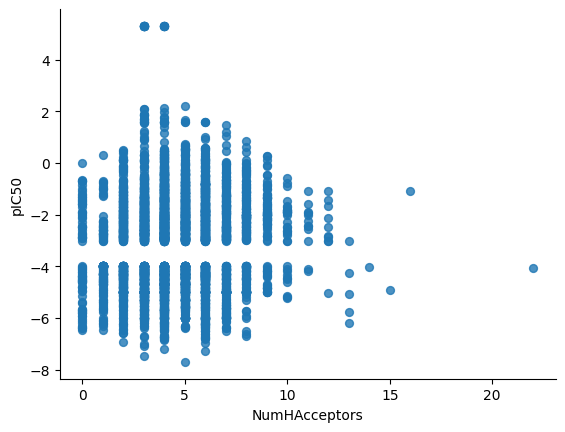

In [67]:
# @title NumHAcceptors vs pIC50

from matplotlib import pyplot as plt
df_2class.plot(kind='scatter', x='NumHAcceptors', y='pIC50', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

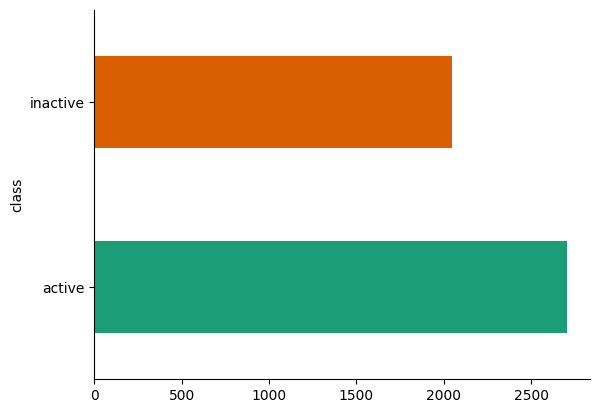

In [66]:
# @title class

from matplotlib import pyplot as plt
import seaborn as sns
df_2class.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='MW', ylabel='LogP'>

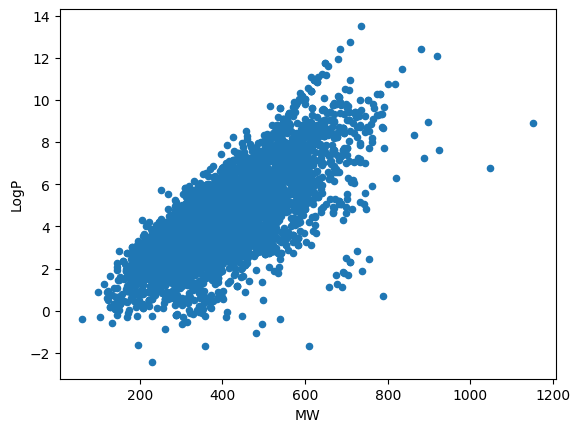

In [65]:
# @title Correlation between MW and LogP

df_2class.plot.scatter(x='MW', y='LogP')

<Axes: xlabel='LogP', ylabel='pIC50'>

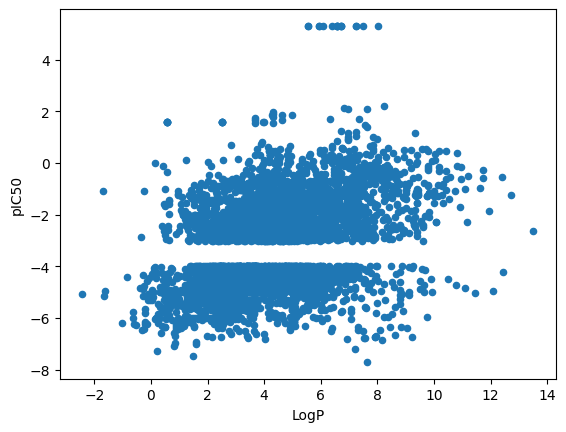

In [64]:
# @title LogP vs pIC50

df_2class.plot.scatter(x='LogP', y='pIC50')

Let's write this to CSV file.

In [69]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [70]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

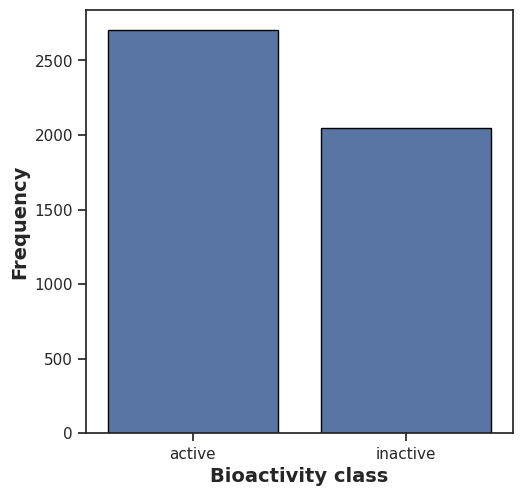

In [71]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

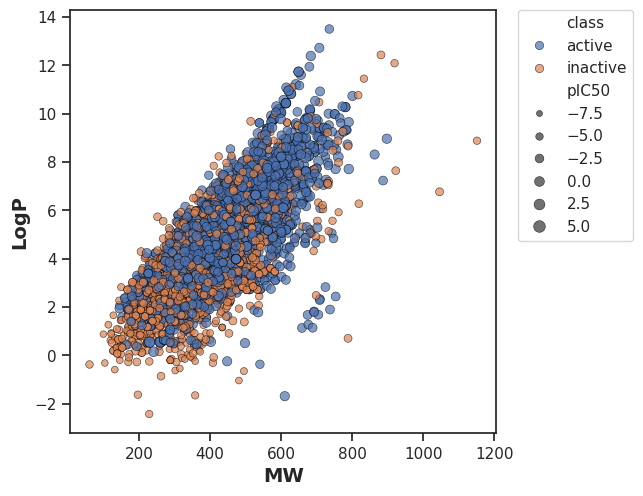

In [72]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

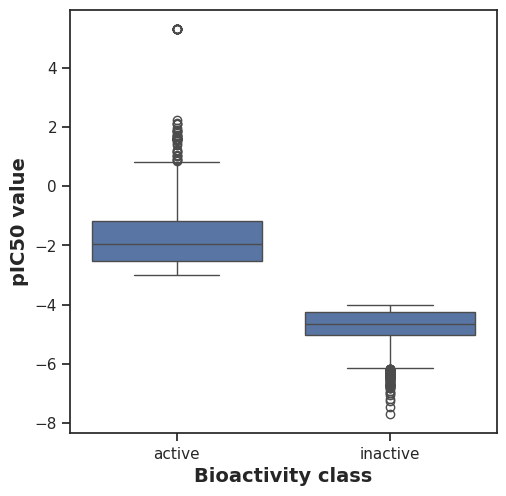

In [73]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [74]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [75]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


#### **MW**

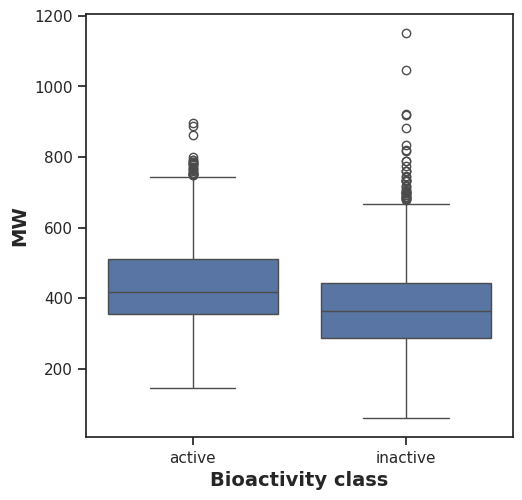

In [76]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [77]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3583448.0,5.124833e-68,0.05,Different distribution (reject H0)


#### **LogP**

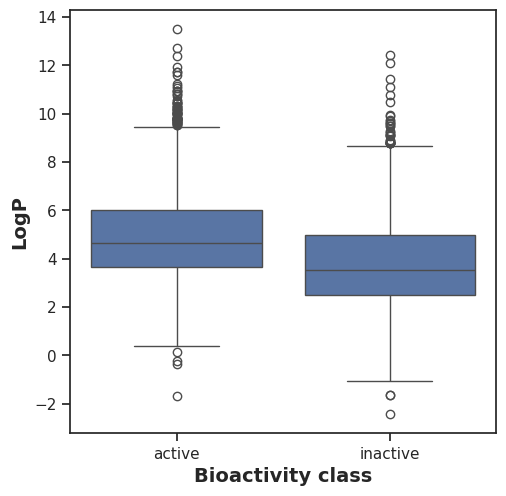

In [78]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [79]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3706669.5,1.677683e-89,0.05,Different distribution (reject H0)


#### **NumHDonors**

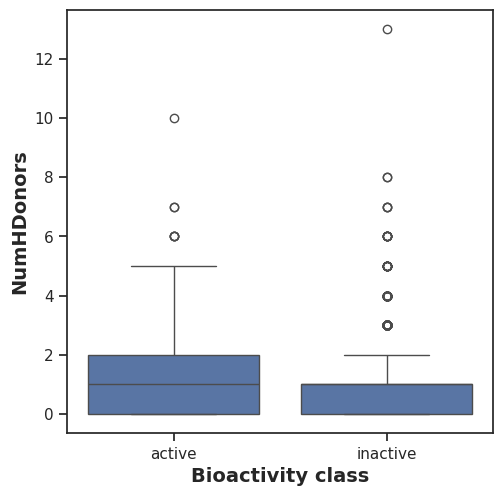

In [80]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [81]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3132896.5,2.554465e-16,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

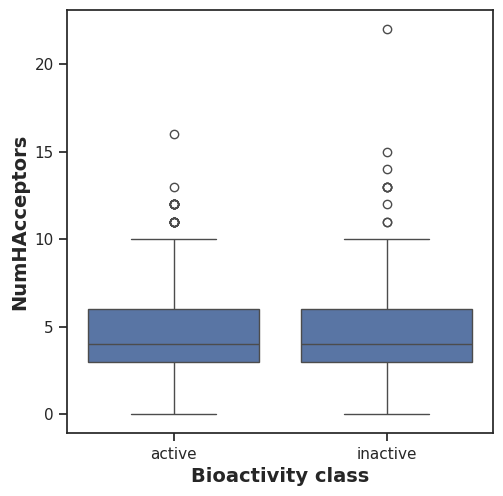

In [82]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [83]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2981077.5,0.000004,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [84]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_LogP.pdf (deflated 37%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 80%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 75%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 91%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
